In [2]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sympy import symbols, diff, lambdify
from scipy.optimize import minimize

#Py files
import multijoueurs_Q as multiQ
import resultsPriceandProfits as res 

In [ ]:
prices = res.PriceOptimizer(nb_players=2)
collusion_profit, collusion_price = prices.CollusionPrice()
nash_profit, nash_price = prices.NashPrice()

print("Collusion profit:", collusion_profit, "Collusion price:", collusion_price)
print("Nash profit:",nash_profit, "Nash price:",nash_price)

In [6]:
import pandas as pd
returndict = {"profit": [22]}
df = pd.DataFrame(returndict)
df.to_csv

,profit
0,22


In [118]:
prices = res.PriceOptimizer(binary_demand=True)
collusion_profit, collusion_price = prices.CollusionPrice()
nash_profit, nash_price = prices.NashPrice()

print("Collusion profit:", collusion_profit, "Collusion price:", collusion_price)
print("Nash profit:",nash_profit, "Nash price:",nash_price)

Collusion profit: 0.125 Collusion price: [1.5]
Nash profit: 0.0 Nash price: [1. 1.]


In [3]:
import numpy as np
 # Changer le nombre de joueurs ici

aggregated_agents = []
for demand in [True, False]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop)
        agents = [multiQ.Agent(binary_demand=demand) for _ in range(2)]
        env = multiQ.Env(binary_demand=demand)

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(10**6):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].S, agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2


In [4]:
aggregated_agents

[array([[ 0.07278061,  0.03716837],
        [ 0.05844388,  0.06864796],
        [-0.00119898,  0.02053571],
        ...,
        [ 0.07007653,  0.10885204],
        [ 0.08211735,  0.08211735],
        [ 0.15459184,  0.07168367]]),
 array([[0.28838894, 0.27969875],
        [0.29168826, 0.25159962],
        [0.33761114, 0.26722926],
        ...,
        [0.2853152 , 0.31176586],
        [0.29906259, 0.29209741],
        [0.31193155, 0.27234684]])]

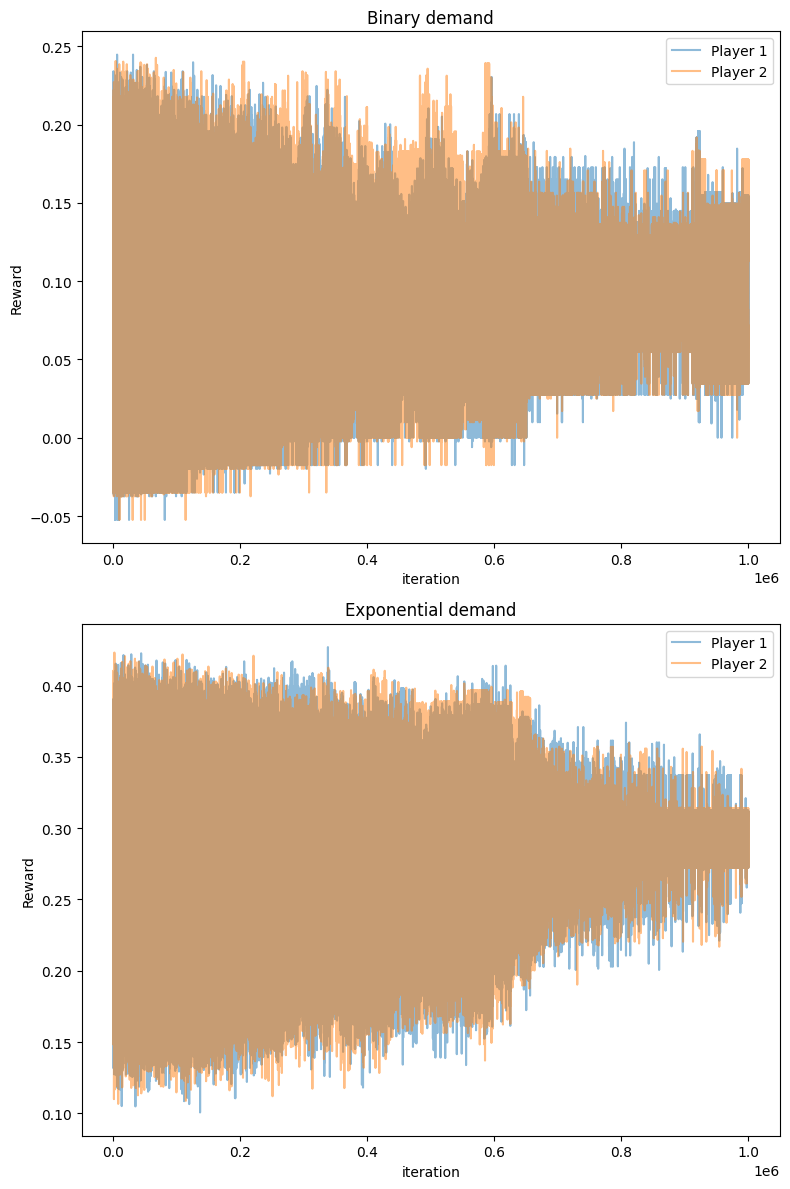

In [5]:
import matplotlib.pyplot as plt
import numpy as np


num_graphs = len(aggregated_agents)
smart_label = ["Binary demand", "Exponential demand"]

# Créer une figure avec autant de sous-graphiques que de périodes
fig, axes = plt.subplots(nrows=num_graphs, figsize=(8, 12))

# Boucle pour itérer à travers les périodes et les sous-graphiques
for graphs in range(num_graphs):
    ax = axes[graphs]
    num_players = len(aggregated_agents[graphs][0])
    # Tracer les courbes pour chaque joueur dans le sous-graphique
    for player in range(num_players):
        ax.plot(aggregated_agents[graphs][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Titre du sous-graphique avec la période correspondante
    ax.set_title(f'{smart_label[graphs]}')
    
    # Ajouter une légende pour chaque sous-graphique
    ax.legend()
    
    # Nommer les axes du sous-graphique
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [6]:
prices = res.PriceOptimizer(nb_players=2)
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()

prices_binary = res.PriceOptimizer(nb_players=2, binary_demand=True)
collusion_profit_binary, collusion_prices_binary = prices_binary.CollusionPrice()
nash_profit_binary, nash_prices_binary = prices_binary.NashPrice()

RN = [nash_profit_binary, nash_profit]
RC = [collusion_profit_binary, collusion_profit]
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(RN, RC)
print(Rmean)
print(DRmean)

av = np.mean(DRmean, axis=1)
print(av)

print("Mean $\\Delta$ for binary demand:", av[0])
print("Mean $\\Delta$ for 'exponential' demand:", av[1])

[0.0, 0.2216948057185367] [0.125, 0.3374904593213026]
[[0.08375638 0.09610281]
 [0.2966595  0.29226777]]
[[0.67005102 0.76882245]
 [0.64738779 0.60946125]]
[0.71943673 0.62842452]
Mean $\Delta$ for binary demand: 0.7194367346938774
Mean $\Delta$ for 'exponential' demand: 0.6284245217451349
